In [3]:
# importing module
import sys
import spacy
import os

import pandas as pd
import spacy
import networkx as nx

import re


In [4]:
# appending a path
sys.path.append('lib/utils/')
 
# importing required module
from functions import *

In [5]:
# Initialize empty list for graphs from books
books_graph = []
# Get all book files in the data directory
all_books = [b for b in os.scandir('books') if b.name.endswith('.pdf')]
# Sort dir entries by name
all_books.sort(key=lambda x: x.name)

# Load spacy English languague model
nlp = spacy.load("en_core_web_sm")

In [12]:
character_df = pd.read_csv("characters.csv")
# Remove brackets and text within brackets
character_df['character'] = character_df['character'].apply(lambda x: re.sub("[\(].*?[\)]", "", x)) 
character_df['character_firstname'] = character_df['character'].apply(lambda x: x.split(' ', 1)[0])

In [13]:
# Loop through book list and create graphs
for book in all_books:
    # Specify the starting page
    if book.name == '0 - Hunger Games.pdf' or book.name == '1 - Catching Fire.pdf' :
        start_page = 3 # hunger games, catching fire
    else:
        start_page =  12 #mockinjay

    book_text = ner(book, start_page)
    
    # Get list of entities per sentences
    sent_entity_df = get_ne_list_per_sentence(book_text)
    
    # Select only character entities
    sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

    # Filter out sentences that don't have any character entities
    sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
    
    
    # Take only first name of characters
    sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] 
                                                                                                               for item in x])

    # Create relationship df
    relationship_df = create_relationships(df = sent_entity_df_filtered, window_size = 5)                                                                                                          
    
    # Create a graph from a pandas dataframe
    G = nx.from_pandas_edgelist(relationship_df, 
                                source = "source", 
                                target = "target", 
                                edge_attr = "value", 
                                create_using = nx.Graph())     
    
    books_graph.append(G) 

C:\Users\camil\AppData\Local\Temp\ipykernel_7020\869351400.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]
C:\Users\camil\AppData\Local\Temp\ipykernel_7020\869351400.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]
C:\Users\camil\AppData\Local\Temp\

       Gale   Katniss    Greasy     Madge     Effie  Haymitch     Peeta  \
0  0.520000  0.440000  0.120000  0.320000  0.400000  0.560000  0.720000   
1  0.490196  0.352941  0.117647  0.156863  0.313725  0.568627  0.666667   
2  0.645833  0.312500  0.125000  0.020833  0.125000  0.479167  0.666667   

    Johanna  Buttercup     Venia  ...    Castor  Coriolanus      Lyme  \
0  0.040000   0.080000  0.160000  ...       NaN         NaN       NaN   
1  0.254902   0.019608  0.098039  ...       NaN         NaN       NaN   
2  0.291667   0.187500  0.125000  ...  0.104167    0.020833  0.083333   

       York   Jackson      Leeg  Mitchell     Homes   Lavinia    Tigris  
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN  
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN  
2  0.020833  0.229167  0.208333     0.125  0.145833  0.020833  0.166667  

[3 rows x 69 columns]


<Axes: >

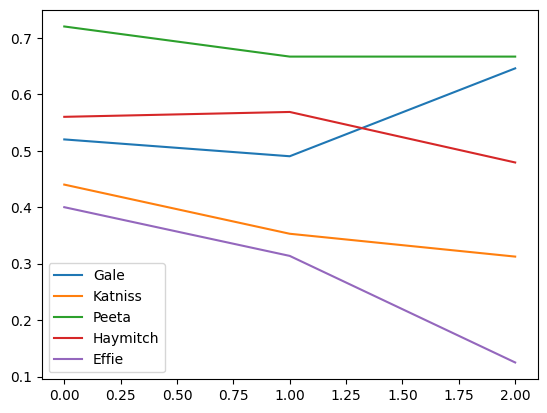

In [18]:
# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books_graph]
# print(evol)
# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)
print(degree_evol_df)

# Plotting the degree centrality evolution of 5 main characters
degree_evol_df[["Gale", "Katniss", "Peeta", "Haymitch", "Effie"]].plot()
